## Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Principal Component Analysis

### 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# This option ensures the graphs are displayed in the notebook without needing to "call" them specifically
%matplotlib inline

In [6]:
# Define path
path = r'C:\Users\16307\Desktop\Tasks - DA Immersion\Gun Violence Analysis'

In [7]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'gun_violence_cleaned3.csv'))

### 2. Data wrangling

In [9]:
columns = ["n_killed", "n_injured", "congressional_district", "n_guns_involved", "state_house_district", "state_senate_district",
          "average_age", "victim_count", "suspect_count", "male_count", "female_count", "child_count", "teen_count", "adult_count",
          "pistol_count", "rifle_count", "shotgun_count", "unknown_gun_count"]

In [10]:
# Create a subset
subset_df = df[columns]

In [11]:
subset_df.head()

,n_killed,n_injured,congressional_district,n_guns_involved,state_house_district,state_senate_district,average_age,victim_count,suspect_count,male_count,female_count,child_count,teen_count,adult_count,pistol_count,rifle_count,shotgun_count,unknown_gun_count
0,0,4,14.0,NaN,NaN,NaN,20.00,4,1,3,1,0,0,5,0,0,0,0
1,1,3,43.0,NaN,62.0,35.0,20.00,4,1,1,0,0,0,4,0,0,0,0
2,1,3,9.0,2.0,56.0,13.0,31.20,3,2,5,0,0,0,5,0,0,0,2
3,4,0,6.0,NaN,40.0,28.0,37.75,3,1,3,1,0,0,4,0,0,0,0
4,2,2,6.0,2.0,62.0,27.0,31.25,3,1,2,2,0,1,3,2,0,0,0


In [12]:
subset_df.shape

(239677, 18)

### 3. Data cleaning

##### Missing values

In [15]:
# Check for missing values
subset_df.isnull().sum()

n_killed                      0
n_injured                     0
congressional_district    11944
n_guns_involved           99451
state_house_district      38772
state_senate_district     32335
average_age               93549
victim_count                  0
suspect_count                 0
male_count                    0
female_count                  0
child_count                   0
teen_count                    0
adult_count                   0
pistol_count                  0
rifle_count                   0
shotgun_count                 0
unknown_gun_count             0
dtype: int64

In [16]:
# Dropping columns
subset_df2 = subset_df.drop(['congressional_district', 'n_guns_involved', 'state_house_district', 'state_senate_district', 'average_age'], axis=1)

##### Duplicates check

In [18]:
dups = subset_df2.duplicated()
dups.shape # No dups

(239677,)

### 4. Principal Component Analysis

In [20]:
subset_df2.columns

Index(['n_killed', 'n_injured', 'victim_count', 'suspect_count', 'male_count',
       'female_count', 'child_count', 'teen_count', 'adult_count',
       'pistol_count', 'rifle_count', 'shotgun_count', 'unknown_gun_count'],
      dtype='object')

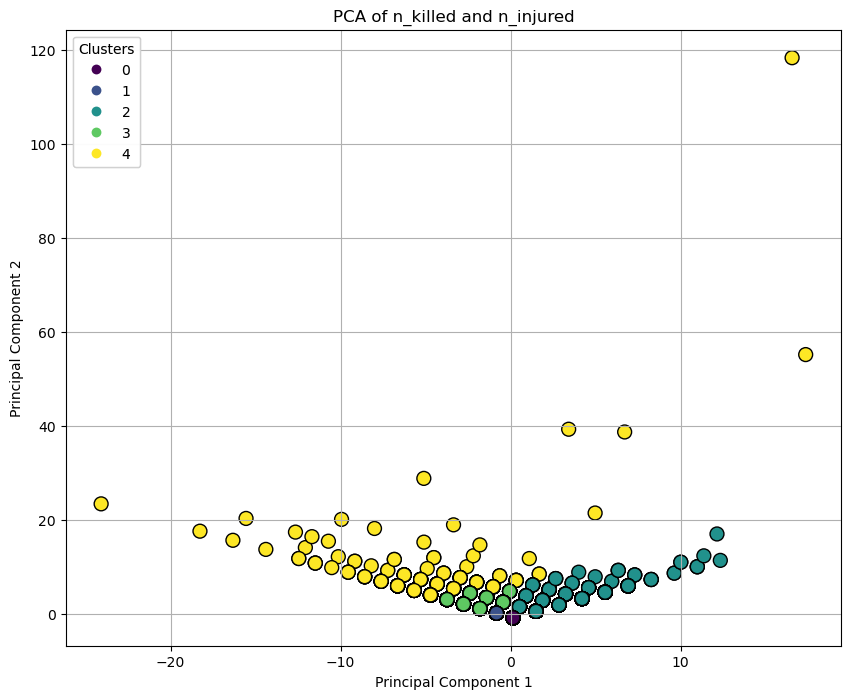

In [21]:
# Principal Component Analysis on 'n_killed' and 'n_injured'

# Select relevant columns for PCA
subset = subset_df2[['n_killed', 'n_injured']] 

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5)
subset_df2['cluster'] = kmeans.fit_predict(X_scaled)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': subset_df2['cluster']
})

# 6. Visualize the results with colors based on clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of n_killed and n_injured')
plt.grid(True)

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

**Observations:**
- The majority of data points are clustered near the origin, meaning that most incidents have low casualty counts.
- There are outliers represented by a few data points scattered far from the origin, indicating incidents with significantly higher casualties.
- Clusters 3 and 4 contain some of these high-casualty incidents, suggesting that these clusters capture the extreme events where multiple people were killed or injured

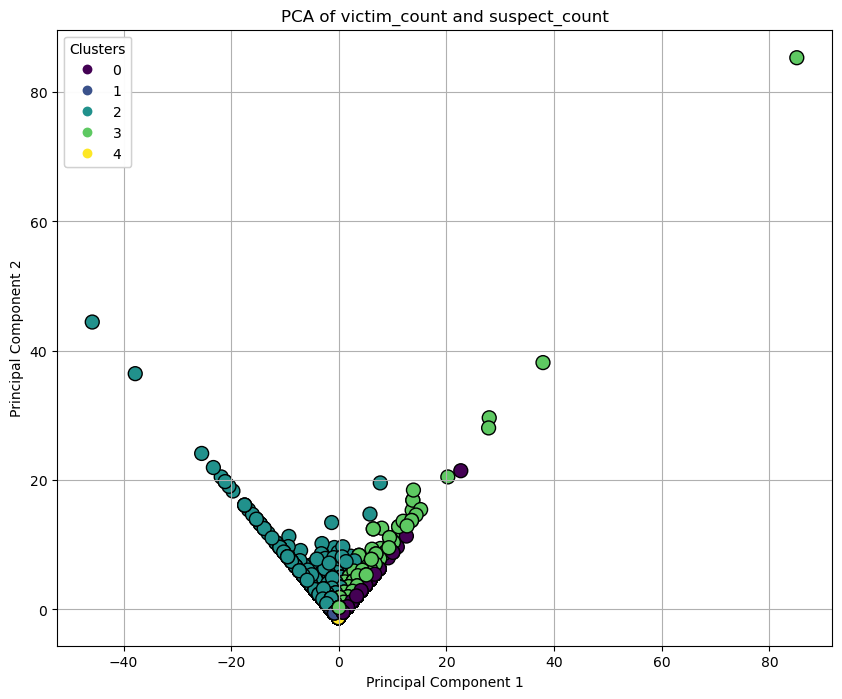

In [22]:
# Principal Component Analysis on 'victim_count' and 'suspect_count'

# Select relevant columns for PCA
subset = subset_df2[['victim_count', 'suspect_count']] 

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5)
subset_df2['cluster'] = kmeans.fit_predict(X_scaled)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': subset_df2['cluster']
})

# 6. Visualize the results with colors based on clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of victim_count and suspect_count')
plt.grid(True)

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

**Observations:**
- The majority of data points are clustered near the origin, meaning that the majority of gun violence incidents involve relatively small numbers of both victim and suspect counts.
- There are outliers represented by a few data points scattered far from the origin, indicating incidents with higher victim and suspect counts.

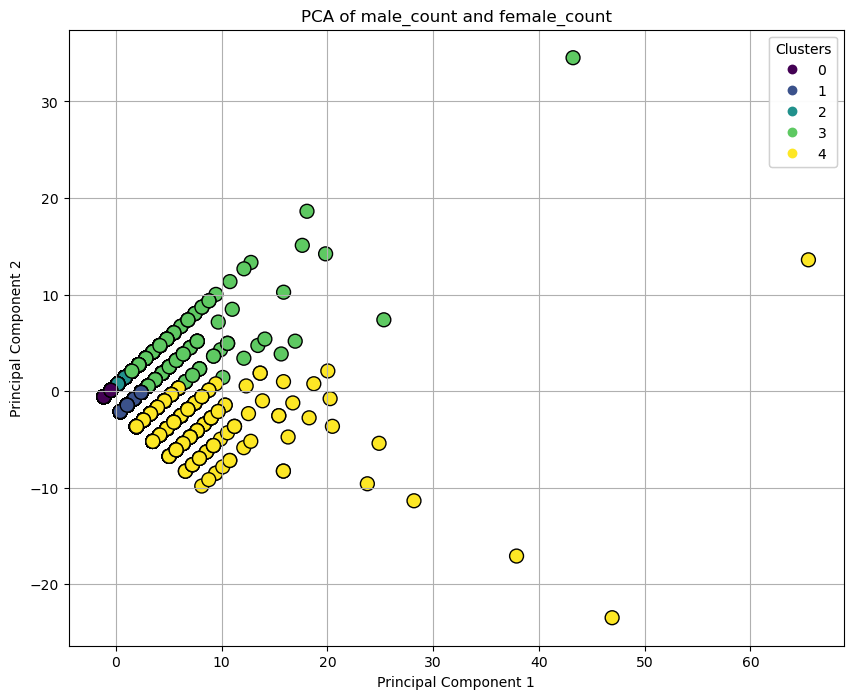

In [23]:
# Principal Component Analysis on 'male_count' and 'female_count'

# Select relevant columns for PCA
subset = subset_df2[['male_count', 'female_count']] 

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5)
subset_df2['cluster'] = kmeans.fit_predict(X_scaled)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': subset_df2['cluster']
})

# 6. Visualize the results with colors based on clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of male_count and female_count')
plt.grid(True)

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

**Observations:**
- Most incidents are concentrated around the origin (Clusters 0, 1, and 2), meaning that the majority of gun violence incidents involve relatively small numbers of both males and females.
- The more spread-out green and yellow (Clusters 3 and 4) indicate rare incidents with much higher numbers of males and females involved. These may be significant outliers or more extreme events.

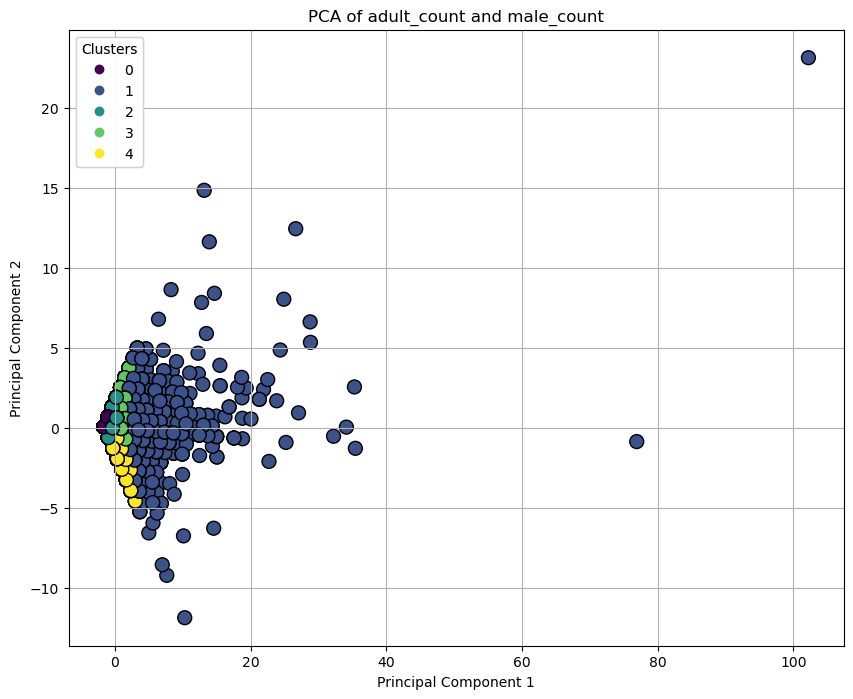

In [24]:
# Principal Component Analysis on 'adult_count' and 'male_count'

# Select relevant columns for PCA
subset = subset_df2[['adult_count', 'male_count']] 

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5)
subset_df2['cluster'] = kmeans.fit_predict(X_scaled)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': subset_df2['cluster']
})

# 6. Visualize the results with colors based on clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of adult_count and male_count')
plt.grid(True)

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

**Observations:**
- Cluster 1 contains most of the incidents, suggesting that a large portion of incidents involve relatively small numbers of adults and males.
- Since most points are clustered horizontally (along PC1), this suggests that the majority of incidents have relatively balanced ratios of males and adults.

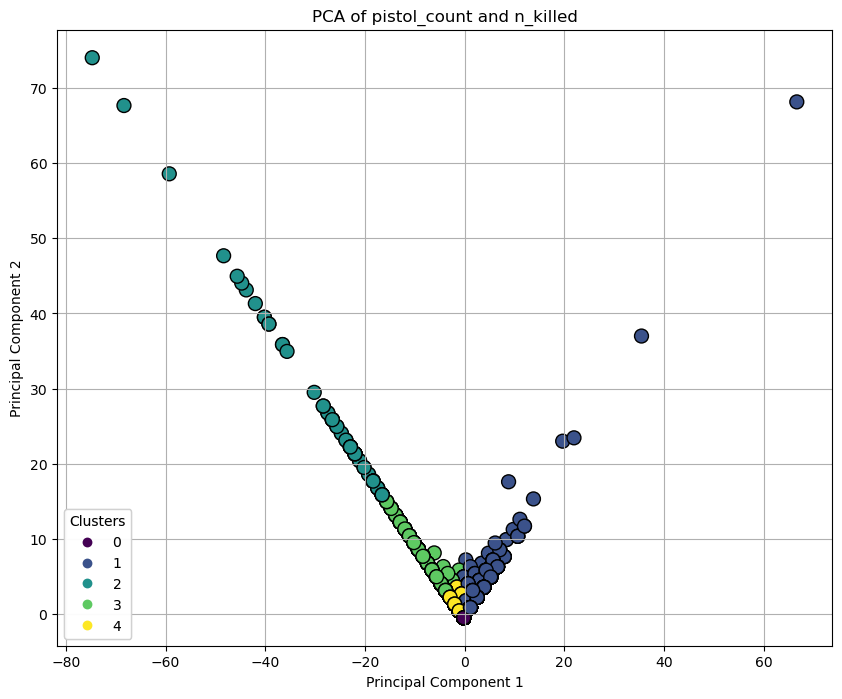

In [25]:
# Principal Component Analysis on 'pistol_count' and 'n_killed'

# Select relevant columns for PCA
subset = subset_df2[['pistol_count', 'n_killed']] 

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5)
subset_df2['cluster'] = kmeans.fit_predict(X_scaled)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': subset_df2['cluster']
})

# 6. Visualize the results with colors based on clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of pistol_count and n_killed')
plt.grid(True)

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

**Observations:**
- The V shape suggests that incidents with high pistol_count (number of pistols used) show varying numbers of n_killed (number of people killed).
- The longer left side of the "V" means that incidents with fewer pistols involved (low PC1 values) tend to have more variability in terms of fatalities, including potentially higher numbers of deaths.

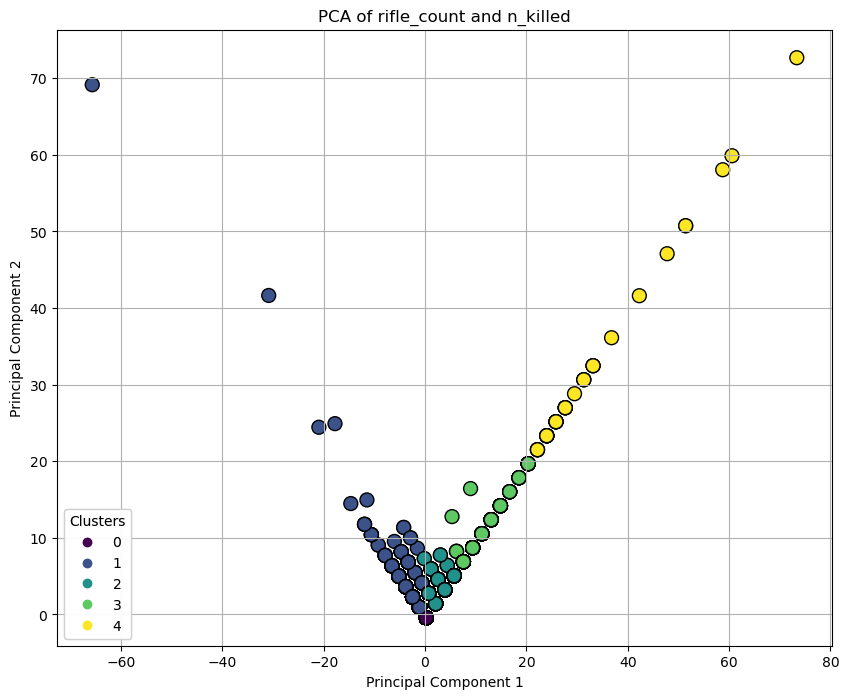

In [26]:
# Principal Component Analysis on 'rifle_count' and 'n_killed'

# Select relevant columns for PCA
subset = subset_df2[['rifle_count', 'n_killed']] 

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5)
subset_df2['cluster'] = kmeans.fit_predict(X_scaled)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': subset_df2['cluster']
})

# 6. Visualize the results with colors based on clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of rifle_count and n_killed')
plt.grid(True)

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

**Observations:**
- The V shape suggests that incidents with high rifle_count (number of rifles used) show varying numbers of n_killed (number of people killed).
- The longer right side of the "V" indicates that incidents involving more rifles (higher rifle_count) tend to be more deadly or result in a wider range of fatalities.

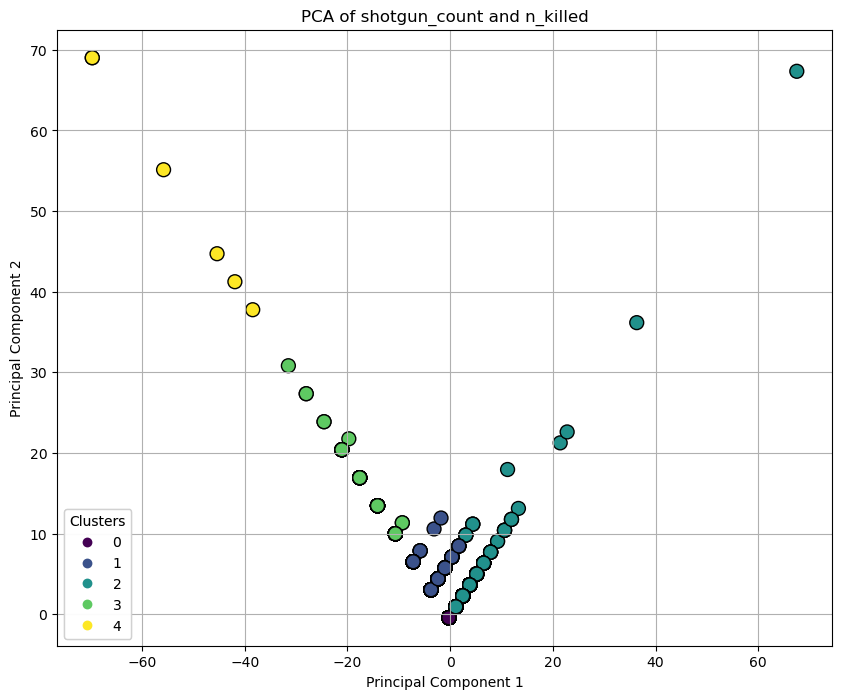

In [27]:
# Principal Component Analysis on 'shotgun_count' and 'n_killed'

# Select relevant columns for PCA
subset = subset_df2[['shotgun_count', 'n_killed']] 

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5)
subset_df2['cluster'] = kmeans.fit_predict(X_scaled)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': subset_df2['cluster']
})

# 6. Visualize the results with colors based on clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of shotgun_count and n_killed')
plt.grid(True)

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

**Observations:**
- Looks similar to the pistol_count vs n_killed plot.
- The V shape suggests that incidents with high shotgun_count (number of shotguns used) show varying numbers of n_killed (number of people killed).
- The longer left side of the "V" means that incidents with fewer shotguns involved (low PC1 values) tend to have more variability in terms of fatalities, including potentially higher numbers of deaths.

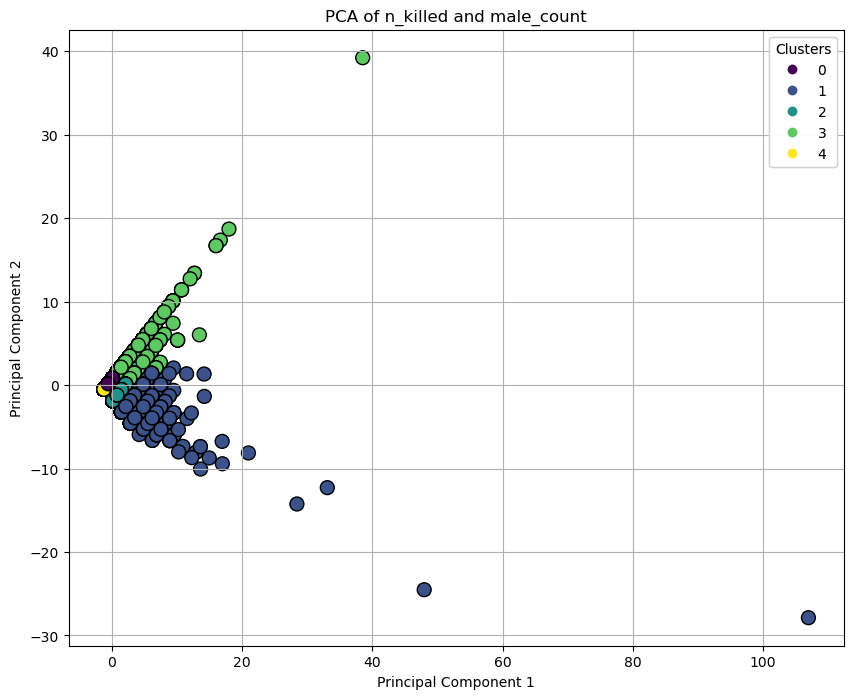

In [28]:
# Principal Component Analysis on 'n_killed' and 'male_count'

# Select relevant columns for PCA
subset = subset_df2[['n_killed', 'male_count']] 

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5)
subset_df2['cluster'] = kmeans.fit_predict(X_scaled)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': subset_df2['cluster']
})

# 6. Visualize the results with colors based on clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of n_killed and male_count')
plt.grid(True)

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

**Observations:**
- The origin represents incidents where the number of males involved (male_count) and the number of fatalities (n_killed) are both low.
- The concentration of points near the origin suggests that most incidents have relatively few fatalities and involve few males.
- The widening gap between the upper and lower jaws along the n_killed axis indicates that as fatalities increase, the difference in male involvement becomes more pronounced. Some incidents involve more males but fewer fatalities, while others involve fewer males but result in higher fatalities.